In [1]:
%run ../utils/common.py
from pymongo import MongoClient
client = MongoClient()
db = client.wikipedia

In [2]:
processed_communities=get_processed_communities()

In [5]:
cosine_sims=[]
for community_id in tqdm(processed_communities):
    with open(f"../data/semantic_similarity/community_{community_id}/similar_section_pairs.json", "r") as f_in:
        for line in f_in:
            json_line=json.loads(line)
            cosine_sims.append(json_line['mean_score'])

  0%|          | 0/7917 [00:00<?, ?it/s]

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def plot_cosine_sim_distribution(cosine_sims):
    plt.figure(figsize=(14,8))
            
    plot=sns.histplot(data=cosine_sims,stat="probability",bins=[i/20+0.5 for i in range(0,11)])
    plot.set_xticks([i/20+0.5 for i in range(0,11)])
    
    plot.set_title("Distribution of cosine similarities")
    plot.set_xlabel("Cosine similarity")
    plot.set_ylabel("Proportion")
    plt.show()

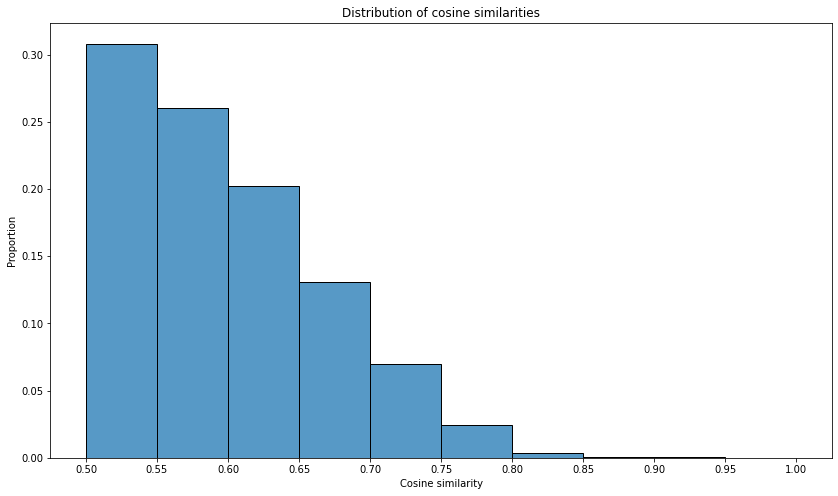

In [12]:
plot_cosine_sim_distribution(cosine_sims)

In [3]:
from statistics import quantiles

In [6]:
quantiles(cosine_sims,n=3)

[0.554182292450042, 0.6228756904602051]

In [9]:
max(cosine_sims)

1.0000008344650269

In [10]:
min(cosine_sims)

0.5000000596046448

In [4]:

for community_id in tqdm(processed_communities):
    cosine_sims_in_community=[]
    with open(f"../data/semantic_similarity/community_{community_id}/similar_section_pairs.json", "r") as f_in:
        for line in f_in:
            json_line=json.loads(line)
            cosine_sims_in_community.append(json_line['mean_score'])
    if len(cosine_sims_in_community)>=2:
        with open(f"../data/semantic_similarity/community_{community_id}/cosine_sim_thresholds.json", "a+") as f_out:
            for i,min_cosine_sim in enumerate(quantiles(cosine_sims_in_community,n=3)):
                semantic_filtering_level=2-i
                f_out.write(json.dumps({'semantic_filtering_level':semantic_filtering_level,'min_cosine_sim':min_cosine_sim})+"\n")

  0%|          | 0/7917 [00:00<?, ?it/s]